Find me on
* GitHub: [coll-j](https://github.com/coll-j)
* LinkedIn: https://www.linkedin.com/in/zkyazz/

In [5]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import numpy as np
import pandas as pd
import joypy
import matplotlib.pyplot as plt
from matplotlib import cm

## Data
Source: https://id.investing.com/commodities/gold-historical-data

Data is in USD per Troy Ounce.

Columns
1. Tanggal: Date of the gold price
2. Terakhir: Last gold price on the day
3. Pembukaan: Initial gold price on the day
4. Tertinggi: Highest gold price on the day
5. Terendah: Lowest gold price on the day
6. Vol: N/A
7. Perubahan: Change in percent from previous date

## About
Tahun is an additional column added to get the date's Year. In this work, Last gold price is used for the visualization. The median of gold price is used to avoid spikes in gold amount. **The goal is to compare** predicted 2022 gold price median to the current year's median.

In [15]:
data = pd.read_csv("data.csv")
data = data.iloc[1:]
data["Tahun"] = data["Tanggal"].apply(lambda tgl: tgl[-4:])
data["Tahun"] = pd.to_numeric(data["Tahun"])
data["Terakhir"] = data["Terakhir"].apply(
    lambda last_price: last_price.replace(".", "").replace(",", "."))
data["Terakhir"] = pd.to_numeric(data["Terakhir"])
data.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Tahun
1,10 Agu 2022,1813.7,"1.811,50","1.824,60","1.803,30","154,59K","0,08%",2022
2,09 Agu 2022,1812.3,"1.805,50","1.817,00","1.799,40","120,51K","0,39%",2022
3,08 Agu 2022,1805.2,"1.790,30","1.806,40","1.786,90","103,68K","0,78%",2022
4,05 Agu 2022,1791.2,"1.807,70","1.811,60","1.780,20","168,90K","-0,87%",2022
5,04 Agu 2022,1806.9,"1.782,10","1.812,00","1.779,40","153,29K","1,72%",2022


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 1 to 2923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     2923 non-null   object 
 1   Terakhir    2923 non-null   float64
 2   Pembukaan   2923 non-null   object 
 3   Tertinggi   2923 non-null   object 
 4   Terendah    2923 non-null   object 
 5   Vol.        2923 non-null   object 
 6   Perubahan%  2923 non-null   object 
 7   Tahun       2923 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 182.8+ KB


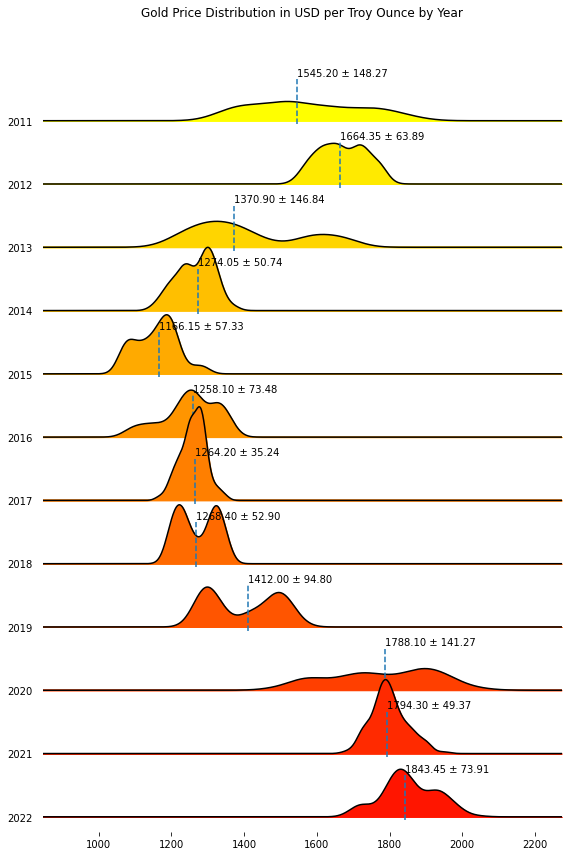

In [73]:
labels = data["Tahun"].unique()
fig, axes = joypy.joyplot(
    data, 
    by="Tahun", 
    column="Terakhir", 
    colormap=cm.autumn_r,
    title="Gold Price Distribution in USD per Troy Ounce by Year",
    figsize=(8, 12))

for idx, ax in enumerate(axes):
  year = idx + 2011
  median = data[data["Tahun"] == year]["Terakhir"].median()
  std = data[data["Tahun"] == year]["Terakhir"].std()
  
  ax.axvline(median, ymin= 0.1, ymax=0.5, linestyle="--", zorder=100)
  ax.annotate(f"{median:.2f} \u00B1 {std:.2f}", xy=(median, 0), xytext=(median, 0.0055), zorder=100)

In [25]:
axes[0].axvline(2000)

In [39]:
data_19xx = pd.read_csv("from_19xx.csv")
data_19xx = data_19xx.iloc[1:]
data_19xx["Tahun"] = data_19xx["Tanggal"].apply(lambda tgl: tgl[-4:])
data_19xx["Tahun"] = pd.to_numeric(data_19xx["Tahun"])
data_19xx["Terakhir"] = data_19xx["Terakhir"].apply(
    lambda last_price: last_price.replace(".", "").replace(",", "."))
data_19xx["Terakhir"] = pd.to_numeric(data_19xx["Terakhir"])
data_19xx.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Tahun
1,04 Nov 1994,384.7,"384,80","385,30","383,50","14,40K","0,08%",1994
2,03 Nov 1994,384.4,"385,00","385,40","384,20","17,75K","-0,29%",1994
3,02 Nov 1994,385.5,"384,70","385,70","384,20","9,68K","-0,05%",1994
4,01 Nov 1994,385.7,"384,70","386,50","384,30","19,06K","0,21%",1994
5,31 Okt 1994,384.9,"388,30","388,70","383,70","23,76K","-0,98%",1994


In [40]:
data_19xx["Tahun"].unique()

array([1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975])

In [41]:
data_19xx.iloc[-1]

Tanggal       03 Jan 1975
Terakhir            174.7
Pembukaan          173,00
Tertinggi          175,50
Terendah           170,50
Vol.                  NaN
Perubahan%         -0,23%
Tahun                1975
Name: 4998, dtype: object

In [74]:
def read_data(fn):
  data = pd.read_csv(fn)
  data["Tahun"] = data["Tanggal"].apply(lambda tgl: tgl[-4:])
  data["Tahun"] = pd.to_numeric(data["Tahun"])
  data["Terakhir"] = data["Terakhir"].apply(
      lambda last_price: last_price.replace(".", "").replace(",", "."))
  data["Terakhir"] = pd.to_numeric(data["Terakhir"])

  return data

In [75]:
all_data = pd.DataFrame()
for i in range(1, 4):
  all_data = pd.concat([all_data, read_data(f"{i}.csv")])

all_data.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Tahun
0,07 Nov 1994,383.3,"383,80","384,20","383,10","25,39K","-0,36%",1994
1,04 Nov 1994,384.7,"384,80","385,30","383,50","14,40K","0,08%",1994
2,03 Nov 1994,384.4,"385,00","385,40","384,20","17,75K","-0,29%",1994
3,02 Nov 1994,385.5,"384,70","385,70","384,20","9,68K","-0,05%",1994
4,01 Nov 1994,385.7,"384,70","386,50","384,30","19,06K","0,21%",1994


In [87]:
year_data = all_data.groupby(by="Tahun").agg({"Terakhir": [np.median, np.std]})
year_data.columns = ["median", "std"]
year_data

,median,std
Tahun,,
1975,166.30,14.743355
1976,128.05,8.757614
1977,148.20,9.474147
1978,187.40,19.167896
1979,285.40,75.643684
1980,635.00,67.444732
1981,464.50,47.113728
1982,372.00,46.253542
1983,424.40,33.079966


Text(0.5, 1.0, 'Median of Gold Price in USD per Troy Ounce 1975 - 2021')

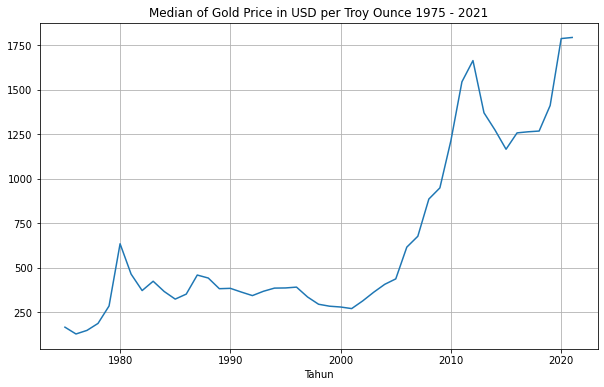

In [96]:
plt.figure(figsize=(10, 6))
year_data.drop(2022)["median"].plot()
plt.grid()
plt.title("Median of Gold Price in USD per Troy Ounce 1975 - 2021")

In [ ]:
X = np.array(year_data.drop(2022).index.values).reshape(-1, 1)
y = np.array(year_data.drop(2022)["median"].values)

X, y

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import t

In [145]:
lower_alpha = 0.1
upper_alpha = 0.9
model_upper = GradientBoostingRegressor(loss="quantile", alpha=upper_alpha)
model_mid = GradientBoostingRegressor()
model_lower = GradientBoostingRegressor(loss="quantile", alpha=lower_alpha)

In [146]:
model_upper.fit(X, y)
model_mid.fit(X, y)
model_lower.fit(X, y)

GradientBoostingRegressor(alpha=0.1, loss='quantile')

In [ ]:
X_2022 = np.append(X, 2022).reshape(-1, 1)
X_2022

In [148]:
pred_2022_upper = model_upper.predict(X_2022)
pred_2022_mid = model_mid.predict(X_2022)
pred_2022_lower = model_lower.predict(X_2022)

pred_2022_upper, pred_2022_mid, pred_2022_lower

(array([ 394.63407854,  394.63407854,  394.63407854,  394.63407854,
         394.63407854,  634.52589415,  464.52516907,  446.99966419,
         446.99966419,  446.99966419,  446.99966419,  446.99966419,
         459.32722909,  440.76193995,  415.27466969,  415.27466969,
         415.27466969,  415.27466969,  415.27466969,  415.27466969,
         415.27466969,  415.27466969,  415.27466969,  415.27466969,
         415.27466969,  415.27466969,  415.27466969,  415.27466969,
         415.27466969,  415.27466969,  436.01550169,  617.33946095,
         678.31018128,  888.20449238,  951.47449238, 1222.21676914,
        1554.11399164, 1636.64346962, 1373.11625586, 1373.11625586,
        1373.11625586, 1373.11625586, 1373.11625586, 1373.11625586,
        1415.45625586, 1788.94234102, 1794.28919057, 1794.28919057]),
 array([ 165.17562159,  134.98690705,  149.6389141 ,  185.46830943,
         286.58306051,  624.16789134,  462.7275337 ,  381.37010911,
         412.32513689,  366.19576511,  335.012

### Prediction Interval
\begin{align}
  \hat{y} \pm t_{(1-\alpha/2, n-2)} \sqrt{\frac{\sum_{i=1}^{n}{(\hat{y} - y)^2}}{n-2} ⋅ (1 + \frac{1}{n} + \frac{(x - \bar{x})^2}{\sum_{i=1}^{n}{(x_i - \bar{x_i})^2}})}
\end{align}

In [149]:
y_pred = model_mid.predict(X)
n = len(y)
standard_error = np.square(y - y_pred).sum()/(n-2)
standard_error

32.11360270167149

In [150]:
x_mean = X.reshape(-1).mean()
sum_squared = np.square(X.reshape(-1) - x_mean).sum()
sum_squared

8648.0

In [151]:
curr_year = 2022
standard_dev = np.sqrt(standard_error * (1 + (1/n) + ((curr_year - x_mean)**2 / sum_squared)))
standard_dev

5.91065116579117

In [152]:
t_stat = t.ppf(1-0.05/2, n-2)
t_stat

2.0141033848332923

### putting it all together

In [153]:
pred_std = t_stat * standard_dev
pred_std

11.90466251958884

In [178]:
pred_2022 = model_mid.predict([[2022]])[0]
pred_2022

1791.206764473478

2022 gold median forecast
\begin{align}
 1791.21 \pm 12.24
\end{align}

In [132]:
concat_data = np.append(year_data.drop(2022)["median"].values, pred_2022_mid.round(2))
concat_data

array([ 166.3 ,  128.05,  148.2 ,  187.4 ,  285.4 ,  635.  ,  464.5 ,
        372.  ,  424.4 ,  366.8 ,  324.  ,  352.05,  459.2 ,  442.35,
        382.5 ,  384.5 ,  363.5 ,  343.75,  368.  ,  385.8 ,  386.7 ,
        391.35,  336.  ,  295.1 ,  284.1 ,  279.6 ,  270.7 ,  313.75,
        362.7 ,  407.1 ,  437.6 ,  616.  ,  677.1 ,  886.3 ,  949.  ,
       1214.8 , 1545.2 , 1664.35, 1370.9 , 1274.05, 1166.15, 1258.1 ,
       1264.2 , 1268.4 , 1412.  , 1788.1 , 1794.3 , 1839.74])

In [164]:
from matplotlib.patches import Rectangle

In [181]:
pred_2022 + pred_std

1803.1114269930667

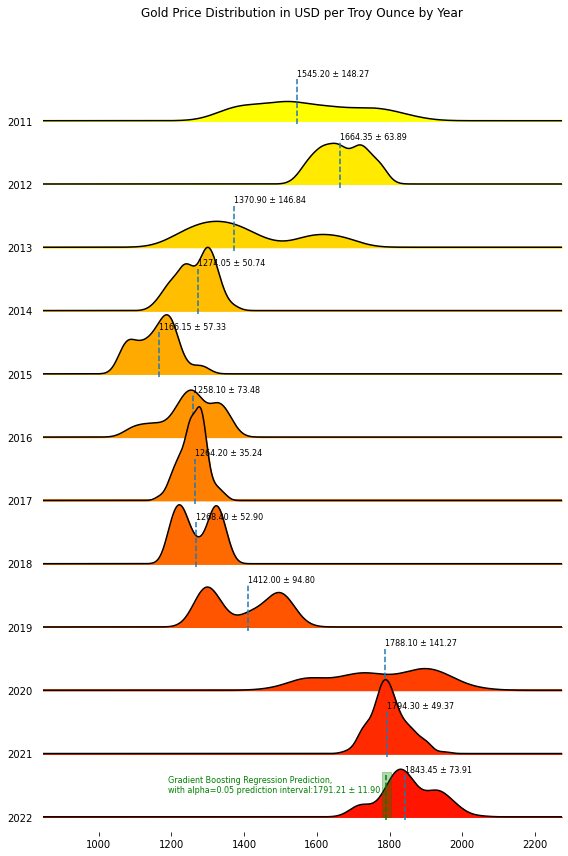

In [213]:
labels = data["Tahun"].unique()
fig, axes = joypy.joyplot(
    data, 
    by="Tahun", 
    column="Terakhir", 
    colormap=cm.autumn_r,
    title="Gold Price Distribution in USD per Troy Ounce by Year",
    figsize=(8, 12))

for idx, ax in enumerate(axes):
  year = idx + 2011
  median = data[data["Tahun"] == year]["Terakhir"].median()
  std = data[data["Tahun"] == year]["Terakhir"].std()
  
  ax.axvline(median, ymin= 0.1, ymax=0.5, linestyle="--", zorder=100)
  ax.annotate(f"{median:.2f} \u00B1 {std:.2f}", xy=(median, 0), xytext=(median, 0.0055), zorder=100, fontsize=8)
  if year == 2022:
    ax.axvline(pred_2022, ymin=0.1, ymax=0.5, zorder=100, color="green", linestyle="--")
    ax.add_patch(Rectangle((pred_2022 - pred_std, 0), pred_std * 2, 0.0055, color="green", alpha=0.3, zorder=100))
    ax.annotate(f"Gradient Boosting Regression Prediction,\nwith alpha=0.05 prediction interval:{pred_2022:.2f} \u00B1 {pred_std:.2f}", xy=(pred_2022, 0)
    , xytext=(pred_2022-600, 0.003), zorder=100, fontsize=8, color="green")
    


Text(0.5, 1.0, 'Median of Gold Price in USD per Troy Ounce 1975 - 2021')

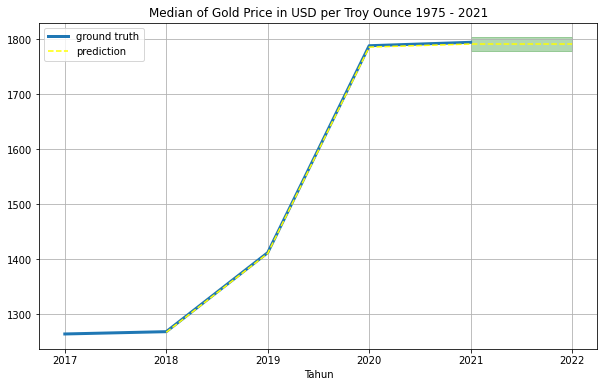

In [214]:
plt.figure(figsize=(10, 6))
year_data.drop(2022)["median"].iloc[-5:].plot(linewidth=3, label="ground truth")
plt.plot(X_2022[-5:], pred_2022_mid[-5:], linestyle="--", color="yellow", label="prediction")
plt.grid()
plt.legend()
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((2021, pred_2022 - pred_std), 1, pred_std * 2, color="green", alpha=0.3))
plt.title("Median of Gold Price in USD per Troy Ounce 1975 - 2021")